# 2021 World Cheese awards analysis
-----

blablalblacheeseblablablablafranceblablabla

## Libraries

In [314]:
import os

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)

import matplotlib.pyplot as plt
import seaborn as sns

color_palette = sns.color_palette()
sns.set_style("darkgrid")

## Download the datatset (Optional step)
You will normaly need to run this step once.  
I am using the `kaggle api` to get the dataset, but you can also directly download it from [here](https://www.kaggle.com/datasets/ericsims/world-cheese-awards-worlds-cheesiest-dataset?select=world_cheese_awards_2021.csv).

Regardless the option you choose, the dataset path should be ***(project_root)*/data/world_cheese_awards_2021.csv**.

### 1. Reading kaggle json credentials
You can go run directly 2. if you decided to put the *kaggle.json* file under in */home/[your_user]/.kaggle*

In [315]:
import json

In [316]:
with open('kaggle.json', 'r', encoding='utf-8') as kaggle_f:
    kaggle_creds = json.load(kaggle_f)
    
os.environ['KAGGLE_USERNAME'] = kaggle_creds['username']
os.environ['KAGGLE_KEY'] = kaggle_creds['key']

### 2. Download dataset with kaggle sdk

After setting kaggle env vars, the kaggle library should be imported without throwing errors

In [317]:
import kaggle
kaggle.api.authenticate()

In [318]:
kaggle.api.dataset_download_file(
    'ericsims/world-cheese-awards-worlds-cheesiest-dataset', 
    'world_cheese_awards_2021.csv', 
    path='data'
)

False

## Import dataset

In [319]:
df = pd.read_csv('data/world_cheese_awards_2021.csv', sep=',', index_col=0)     # first csv col is the index

In [320]:
df.shape

(1741, 6)

In [321]:
df.dtypes

company         object
product_name    object
rating          object
category        object
country         object
county          object
dtype: object

In [322]:
df.head(n=5)

,company,product_name,rating,category,country,county
0,Laiteries H. Triballat Website,Picandou L'Original,GOLD,5001 - Soft goats’ milk cheese plain – fresh,France,NaN
1,Fromageries Lescure (Savencia) Website,ISLOS GREEK GOAT CHEESE 150G,BRONZE,5001 - Soft goats’ milk cheese plain – fresh,Greece,NaN
2,Casale Roccolo azienda agricola biologica Website,Caprino Fresco CASALE ROCCOLO,SILVER,5001 - Soft goats’ milk cheese plain – fresh,Italy,NaN
3,DeJong Cheese Website,Alphenaer Crumbled Goats Cheese Natural View Stockists,BRONZE,5001 - Soft goats’ milk cheese plain – fresh,Netherlands,NaN
4,DeJong Cheese Website,Alphenaer Spreadable Goats Cheese Natural View Stockists,BRONZE,5001 - Soft goats’ milk cheese plain – fresh,Netherlands,NaN


In [323]:
df.tail(n=5)

,company,product_name,rating,category,country,county
1736,Macroom Buffalo Cheese Products Website,Macroom Buffalo Ricotta 200g,SILVER,5709 - Ricotta made with buffalos' milk,Ireland,NaN
1737,Diaccialone Società Agricola Website,Ricotta di Bufala 250g,BRONZE,5709 - Ricotta made with buffalos' milk,Italy,NaN
1738,Macroom Buffalo Cheese Products Website,Macroom Buffalo Greek Style Cheese 180g,BRONZE,5710 - Any other buffalo's milk cheese not in any other class,Ireland,NaN
1739,CILENTO SPA Website,Lactose free Mozzarella di Bufala Campana PDO 180g,SILVER,5710 - Any other buffalo's milk cheese not in any other class,Italy,NaN
1740,Quattro Portoni s.r.l. – Società Agricola Website,QUADRELLO View Stockists,SILVER,5710 - Any other buffalo's milk cheese not in any other class,Italy,NaN


## Missing data
Not much missing data except in *county* column.  
Let's keep in mind that county is applicable only when the country is UK.  
So nothing much to fear regarding missing values, the dataset looks pretty full.

In [324]:
per_missing = df.isna().sum() / df.shape[0]
per_missing[per_missing > 0].sort_values(ascending=False)

county    0.951177
dtype: float64

In [325]:
df.county.value_counts()

Somerset             19
Nottinghamshire       6
West Yorkshire        6
Leicestershire        6
Gloucestershire       5
Cornwall              5
Berkshire             4
North Yorkshire       4
Devon                 3
Greater London        3
Kent                  3
Hampshire             3
Wiltshire             2
Western Isles         2
Oxfordshire           2
Ceredigion            2
North Ayrshire        2
Powys                 1
Dublin                1
Fife                  1
Perth and Kinross     1
Dorset                1
Isle of Man           1
Lancashire            1
West Sussex           1
Name: county, dtype: int64

In [326]:
df.country[df.county.notna()].value_counts()

United Kingdom    85
Name: country, dtype: int64

## Data cleaning

### Companies's name

In [327]:
df.company = df.company.apply(lambda x: x.rstrip(' Website'))
df.company.head(5)

0                        Laiteries H. Triballa
1               Fromageries Lescure (Savencia)
2    Casale Roccolo azienda agricola biologica
3                                    DeJong Ch
4                                    DeJong Ch
Name: company, dtype: object

## Feature engineering

### Separate category code and name

In [328]:
def create_features(df: pd.DataFrame) -> pd.DataFrame:
    _df = df.copy()
    _df['cat_code'] = _df.category.apply(lambda x: x.split(' - ')[0])
    _df.cat_code = pd.to_numeric(_df.cat_code)
    _df.category = _df.category.apply(lambda x: x.split(' - ')[1])
    
    return _df

In [329]:
df = create_features(df)

In [330]:
df[['category', 'cat_code']]

,category,cat_code
0,Soft goats’ milk cheese plain – fresh,5001
1,Soft goats’ milk cheese plain – fresh,5001
2,Soft goats’ milk cheese plain – fresh,5001
3,Soft goats’ milk cheese plain – fresh,5001
4,Soft goats’ milk cheese plain – fresh,5001
...,...,...
1736,Ricotta made with buffalos' milk,5709
1737,Ricotta made with buffalos' milk,5709
1738,Any other buffalo's milk cheese not in any other class,5710
1739,Any other buffalo's milk cheese not in any other class,5710


## Target analysis

In [331]:
target = 'rating'
features = [col for col in df.columns if col != target]
target, features

('rating',
 ['company', 'product_name', 'category', 'country', 'county', 'cat_code'])

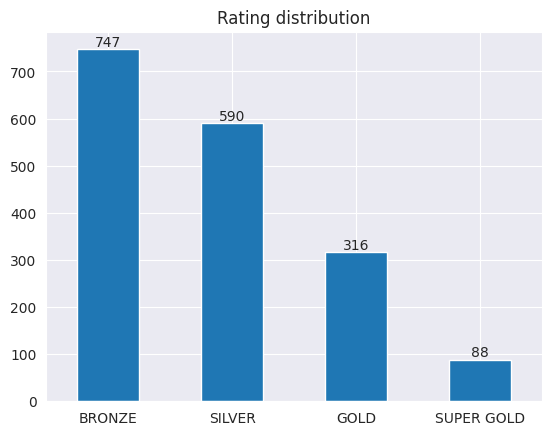

In [402]:
ax = df[target].value_counts().plot.bar()
ax.bar_label(ax.containers[0])
plt.xticks(rotation=0)
plt.title('Rating distribution')
plt.show()

## Who got the most appreciated cheeses ? Top 15 countries per rating

In [478]:
df_ratings = df[['country', 'rating']]
ratings = ['SUPER GOLD', 'GOLD', 'SILVER', 'BRONZE']
n = 100

In [479]:
def get_top_countries(df: pd.DataFrame, rating_cat: str, n: int=5):
    """d"""
    coutries_rt = df[df.rating == rating_cat].groupby('country').rating.count()
    sorted_rt = coutries_rt.sort_values(ascending=False)
    df_rt = sorted_rt.to_frame(name=rating_cat).reset_index()
    return df_rt.head(n)

In [480]:
def get_top_ranking(df, rating_cats: list[str], n: int=5) -> pd.DataFrame:
    """d"""
    top_all_rt = None
    
    for rt in rating_cats:
        top_rt = get_top_countries(df, rt, n)
        
        if top_all_rt is None:
            top_all_rt = top_rt
        else:
            top_all_rt = top_all_rt.merge(top_rt, how='inner', on='country').fillna(0)   # TODO : fix ommited values by merging
    
    # Additional columns
    total = top_all_rt.sum(axis=1, numeric_only=True)   
    top_all_rt['TOTAL'] = total                     # total number of prizes per country
    
    top_all_rt = top_all_rt.set_index('country')    # set country as index
    top_all_rt = top_all_rt.astype(int)             # cast all columns to int
    
    return top_all_rt

Look at this beautiful cross table !  
It shows Spain having the most prizes in every rating.  
"Hey, that's not fair ! Spain had *way* more cheeses in the competition !"

In [481]:
top_all = get_top_ranking(df_ratings, ratings, n)
top_all.sort_values(by='SUPER GOLD', ascending=False)

,SUPER GOLD,GOLD,SILVER,BRONZE,TOTAL
country,,,,,
Spain,27,118,246,332,723
Italy,15,70,116,119,320
Netherlands,8,15,22,35,80
United Kingdom,8,14,23,40,85
France,7,21,35,25,88
Belgium,5,4,6,14,29
Austria,4,13,21,34,72
Switzerland,3,20,34,29,86
Japan,2,3,3,6,14


Another type of ranking could be to compute the share of each prize in the total number of obtained prizes for the country. This time, Japan rules !  
The cross table gives us interesting insights of the competition !  
"Hey that's not fair ! Japan has only 2 cheeses in the competition ! Isn't this ranking giving an *outrageous* advantage to countries with fewer cheeses ?"

In [482]:
per_top_all = top_all.copy()
per_top_all.loc[:,:'BRONZE'] = (top_all.divide(top_all.TOTAL, axis=0) * 100).round(2)
per_top_all.sort_values('SUPER GOLD', ascending=False)

,SUPER GOLD,GOLD,SILVER,BRONZE,TOTAL
country,,,,,
Belgium,17.24,13.79,20.69,48.28,29
Sweden,16.67,16.67,16.67,50.00,6
Japan,14.29,21.43,21.43,42.86,14
Canada,11.11,22.22,44.44,22.22,9
Netherlands,10.00,18.75,27.50,43.75,80
United Kingdom,9.41,16.47,27.06,47.06,85
Portugal,8.70,17.39,26.09,47.83,23
France,7.95,23.86,39.77,28.41,88
Greece,7.69,7.69,30.77,53.85,13


*sight* We would argue that Ireland or Germany are not doing so great despite having less cheese.  
But I agree on one point : just like the Olympics Games, we only based our ranking on the total number of obtained "SUPER GOLD".

Few ideas :

1. Do like schools (mostly western europe) to compute a final 'end of the semester' mark.  
It consist in computing the mean of all obtained ratings and ponderating each rating type in the computation  
Giving us : $$mark = {nSUPERGOLD*x + ... + nBRONZE*k \over 4} $$

2. Attribute a number of points for each type of rating and compute the total points.  
This is nothing new, several ranking systems already exist for this kind of competition.
See [here](https://www.topendsports.com/events/summer/medal-tally/rankings.htm#:~:text=The%20common%20method%20of%20determining,still%20no%20'official'%20method.) for more details.

I'll go with the **Fibonacci weighted point system (4:3:2:1)**, you are free to choose one you like.

Wait hold on, did we just questionned the entire ranking system of the Olympics Games ?  